In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.19.0 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0


In [3]:
# Map annotations to abbreviated names
def annotation_abbr(annotations):
    tmp = []
    for ann in annotations:
        ann = ann.replace('Natural killer T (NKT) cell','NKT')
        ann = ann.replace('dendritic cell','DC')
        ann = ann.replace('Endothelial cell','EC')
        ann = ann.replace('Monocyte','Mo')
        ann = ann.replace('Macrophage','MP')
        ann = ann.replace('Hematopoietic stem cell','HSC')
        ann = ann.replace('Mesenchymal stem cell','MSC')
        ann = ann.replace('Natural killer cell','NK')
        ann = ann.replace('Embryonic stem cell','ESC')
        ann = ann.replace('Regulatory T (Treg) cell', 'Treg')
        for i in range(1,100):
            Th = ' (Th'+str(i)+')'
            ann = ann.replace(Th,'')
        ann = ann.replace('T helper', 'Th')
        ann = ann.replace(' cell','')
        ann = ann.replace('-','UND')
        tmp.append(ann)
    return tmp

In [4]:
def names_make_unique(annotations):
    ann_dic = {}
    # construct dictionary for all names, cluster indices will be stored for each name
    for i,ann in enumerate(annotations):
        if ann_dic.get(ann)==None:
            ann_dic[ann] = [i]
        else:
            ann_dic[ann].append(i)
    #  
    for ann in ann_dic:
        num = len(ann_dic[ann])
        if num > 1:
            for indx in ann_dic[ann]:
                annotations[indx] = '('+ann+')'+'_'+ str(num)
                num -= 1
    return annotations

In [5]:
combined_umap = sc.read('/scratch/combined_umap.h5ad')

In [6]:
umap_annotation_output=[['0', 'N', '-', '-', '-'],
['1', '?', 'Natural killer T (NKT) cell|Mesenchymal stem cell', '6.789255955543727|3.62339519688401', 1.8737277019581644],
['10', '?', 'Hematopoietic stem cell|T helper2 (Th2) cell', '4.423978064166158|3.415031274822857', 1.2954429134461254],
['11', '?', 'Monocyte|Macrophage', '7.574118652632508|5.218927301397435', 1.451278819424145],
['12', '?', 'Monocyte|Macrophage', '6.597880915622259|5.17851136085383', 1.2740883346318284],
['13', 'Good', 'B cell', 10.712629004889104, 6.624189414850838],
['14', '?', 'Plasmacytoid dendritic cell|B cell', '7.315730734273448|4.752392406029024', 1.5393785085996892],
['2', '?', 'Natural killer cell|T cell', '6.839859718469629|4.867040969732206', 1.405342539955231],
['3', '?', 'Mesenchymal stem cell|Endothelial cell', '3.5727191967619127|3.385739264598308', 1.0552257328609704],
['4', '?', 'Primordial germ cell|Germ cell', '2.7037391356548084|2.7037391356548084', 1.0],
['5', '?', 'Natural killer cell|Natural killer T (NKT) cell', '5.253475957750779|3.5363850835971236', 1.4855497446016463],
['6', '?', 'Naive T cell|Central memory T cell', '4.4716166976448335|3.0428647413566403', 1.4695417239121822],
['7', '?', 'Natural killer cell|T cell', '4.446676795229464|3.162574263735394', 1.4060307915038126],
['8', 'Good', 'B cell', 7.630237382460735, 2.1501103465350835],
['9', 'Good', 'Natural killer cell', 7.995230399301316, 3.0963599640796695]]

In [7]:
# extract annotations
umap_cluster_names = [None for _ in range(len(umap_annotation_output))]
for annotation in umap_annotation_output:
    index = int(annotation[0])
    name = annotation[2]
    umap_cluster_names[index] = name
    
umap_cluster_names = annotation_abbr(umap_cluster_names)
umap_cluster_names = names_make_unique(umap_cluster_names) 

### Results for Automatic Annotations

In [8]:
# View cluster annotations and get the number of labels that needs extra attention
for i,name in enumerate(umap_cluster_names):
    print((i,name))

(0, 'UND')
(1, 'NKT|MSC')
(2, '(NK|T)_2')
(3, 'MSC|EC')
(4, 'Primordial germ|Germ')
(5, 'NK|NKT')
(6, 'Naive T|Central memory T')
(7, '(NK|T)_1')
(8, '(B)_2')
(9, 'NK')
(10, 'HSC|Th2')
(11, '(Mo|MP)_2')
(12, '(Mo|MP)_1')
(13, '(B)_1')
(14, 'Plasmacytoid DC|B')


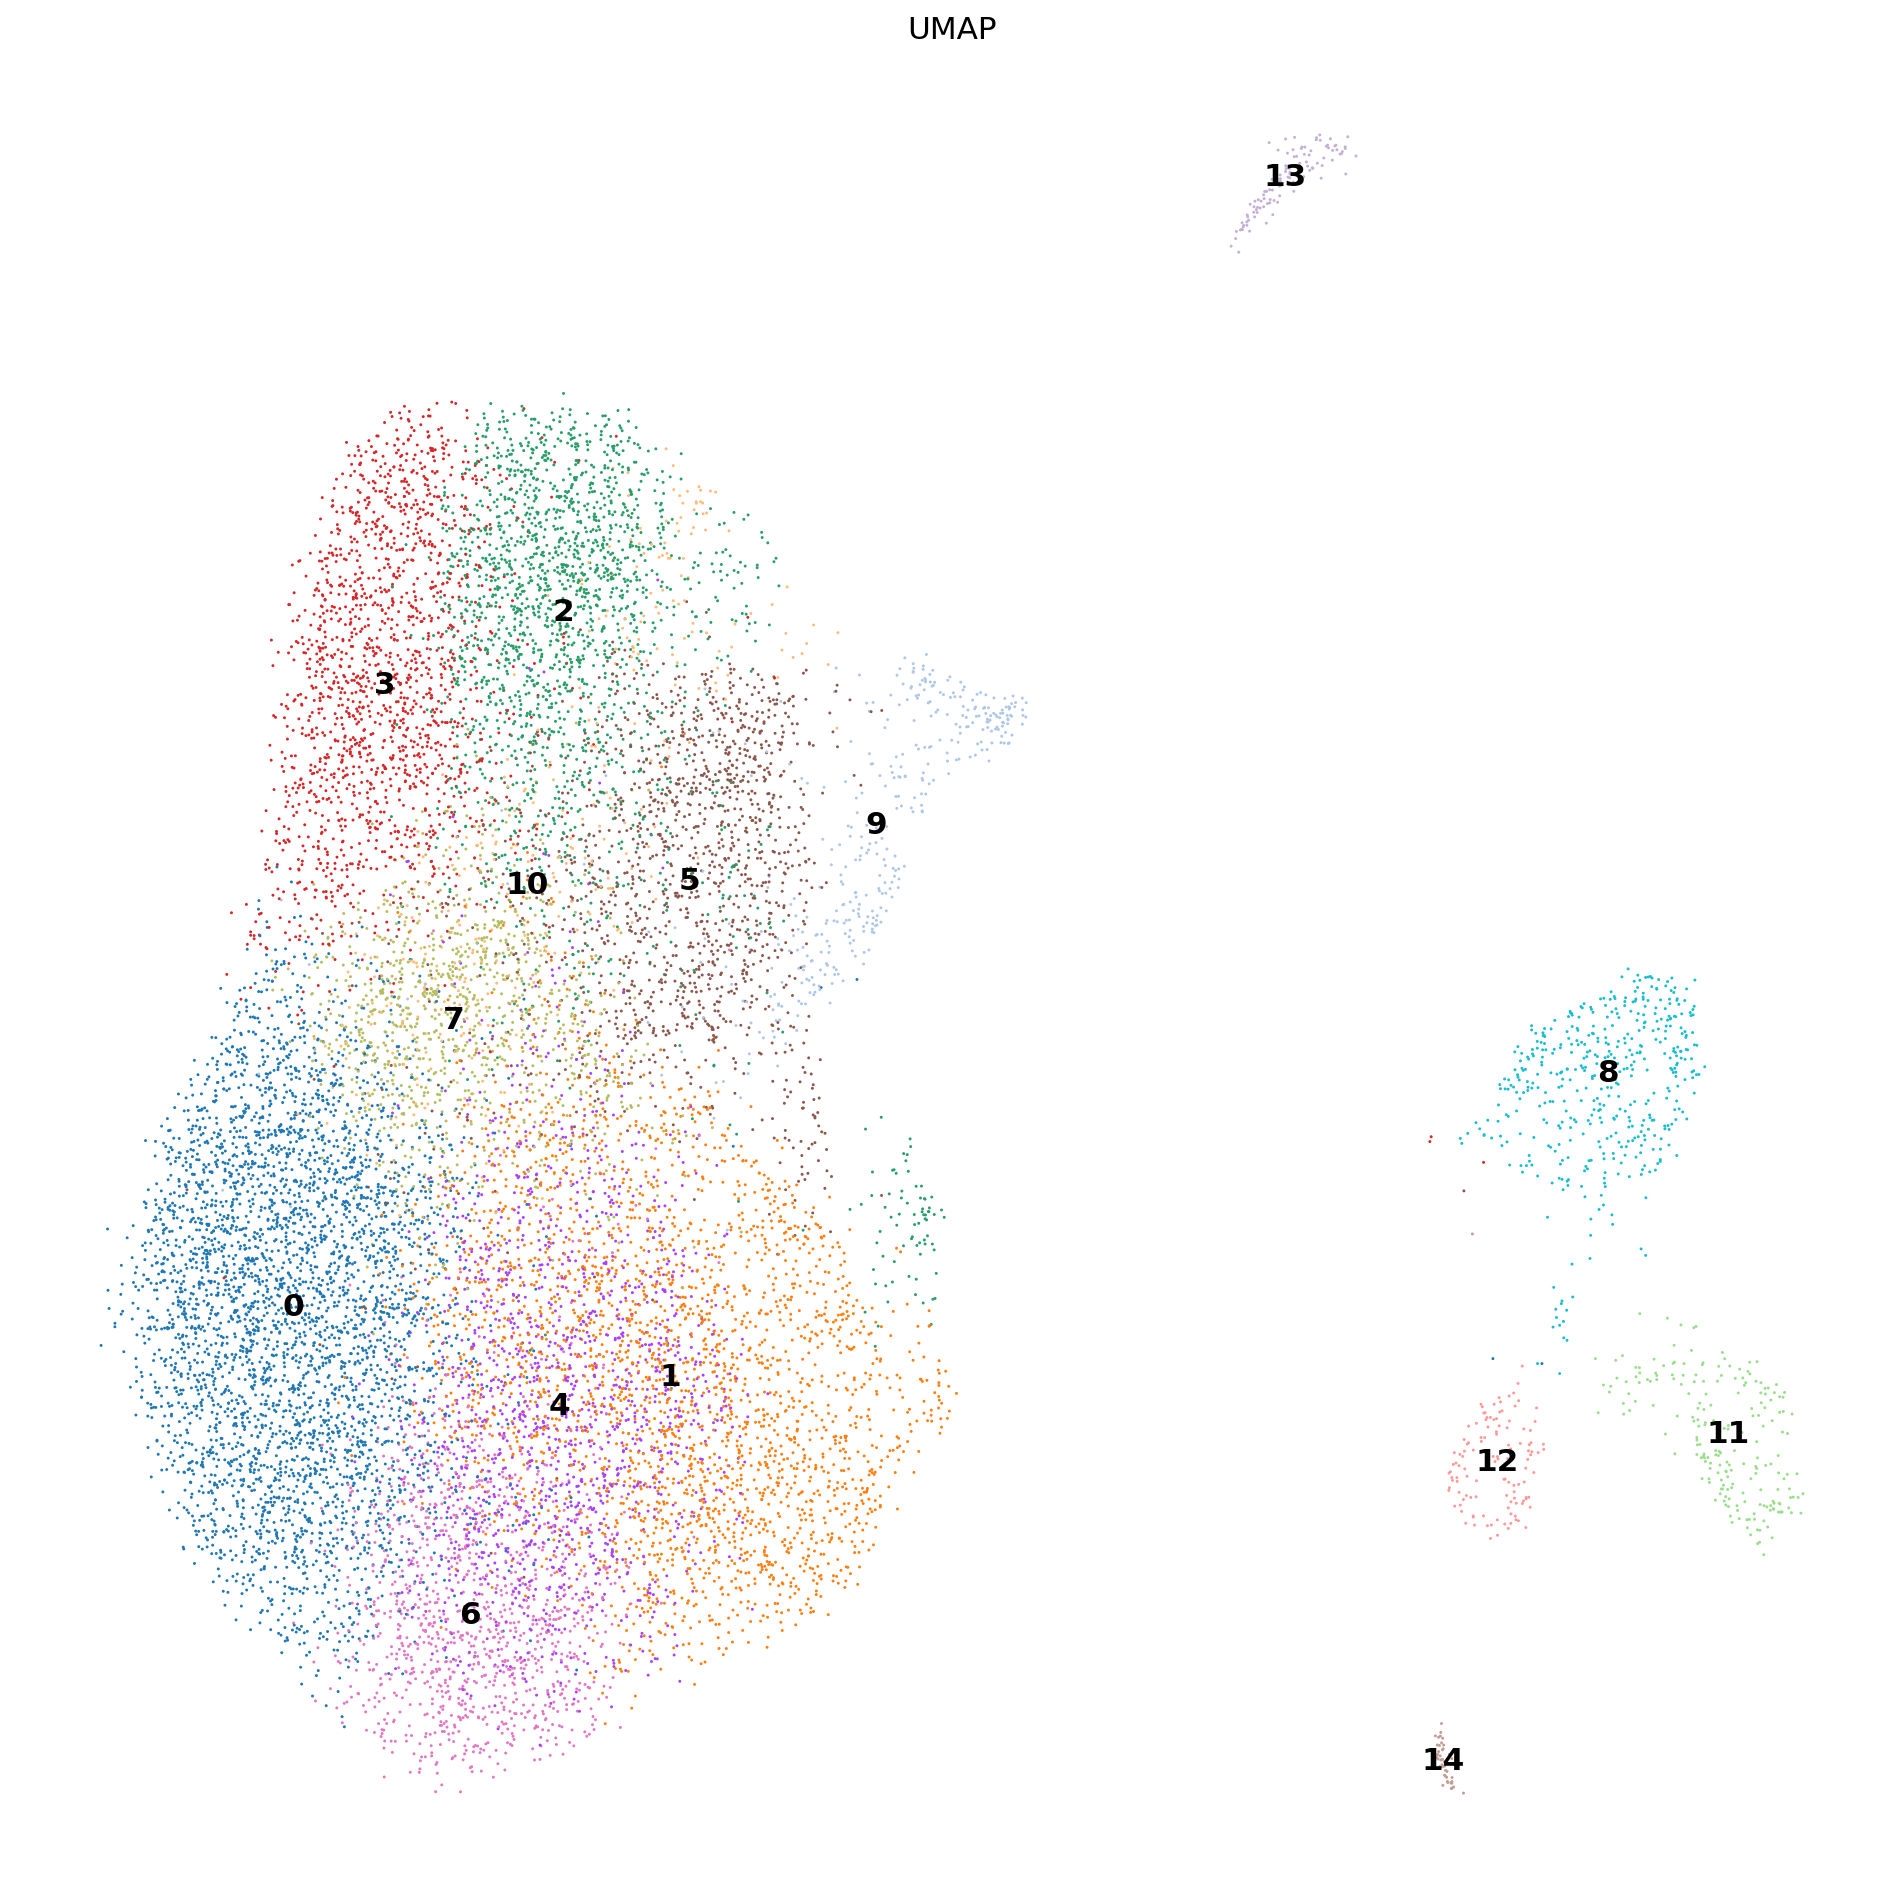

In [9]:
f, ax = plt.subplots(1, 1, figsize = (15, 15))
sc.pl.umap(combined_umap, color='louvain', title='UMAP', frameon=False,legend_loc='on data',ax=ax)

### Putting Annotations on Clusters

For details of abbreviations, refer to the function annotation_abbr() defined above

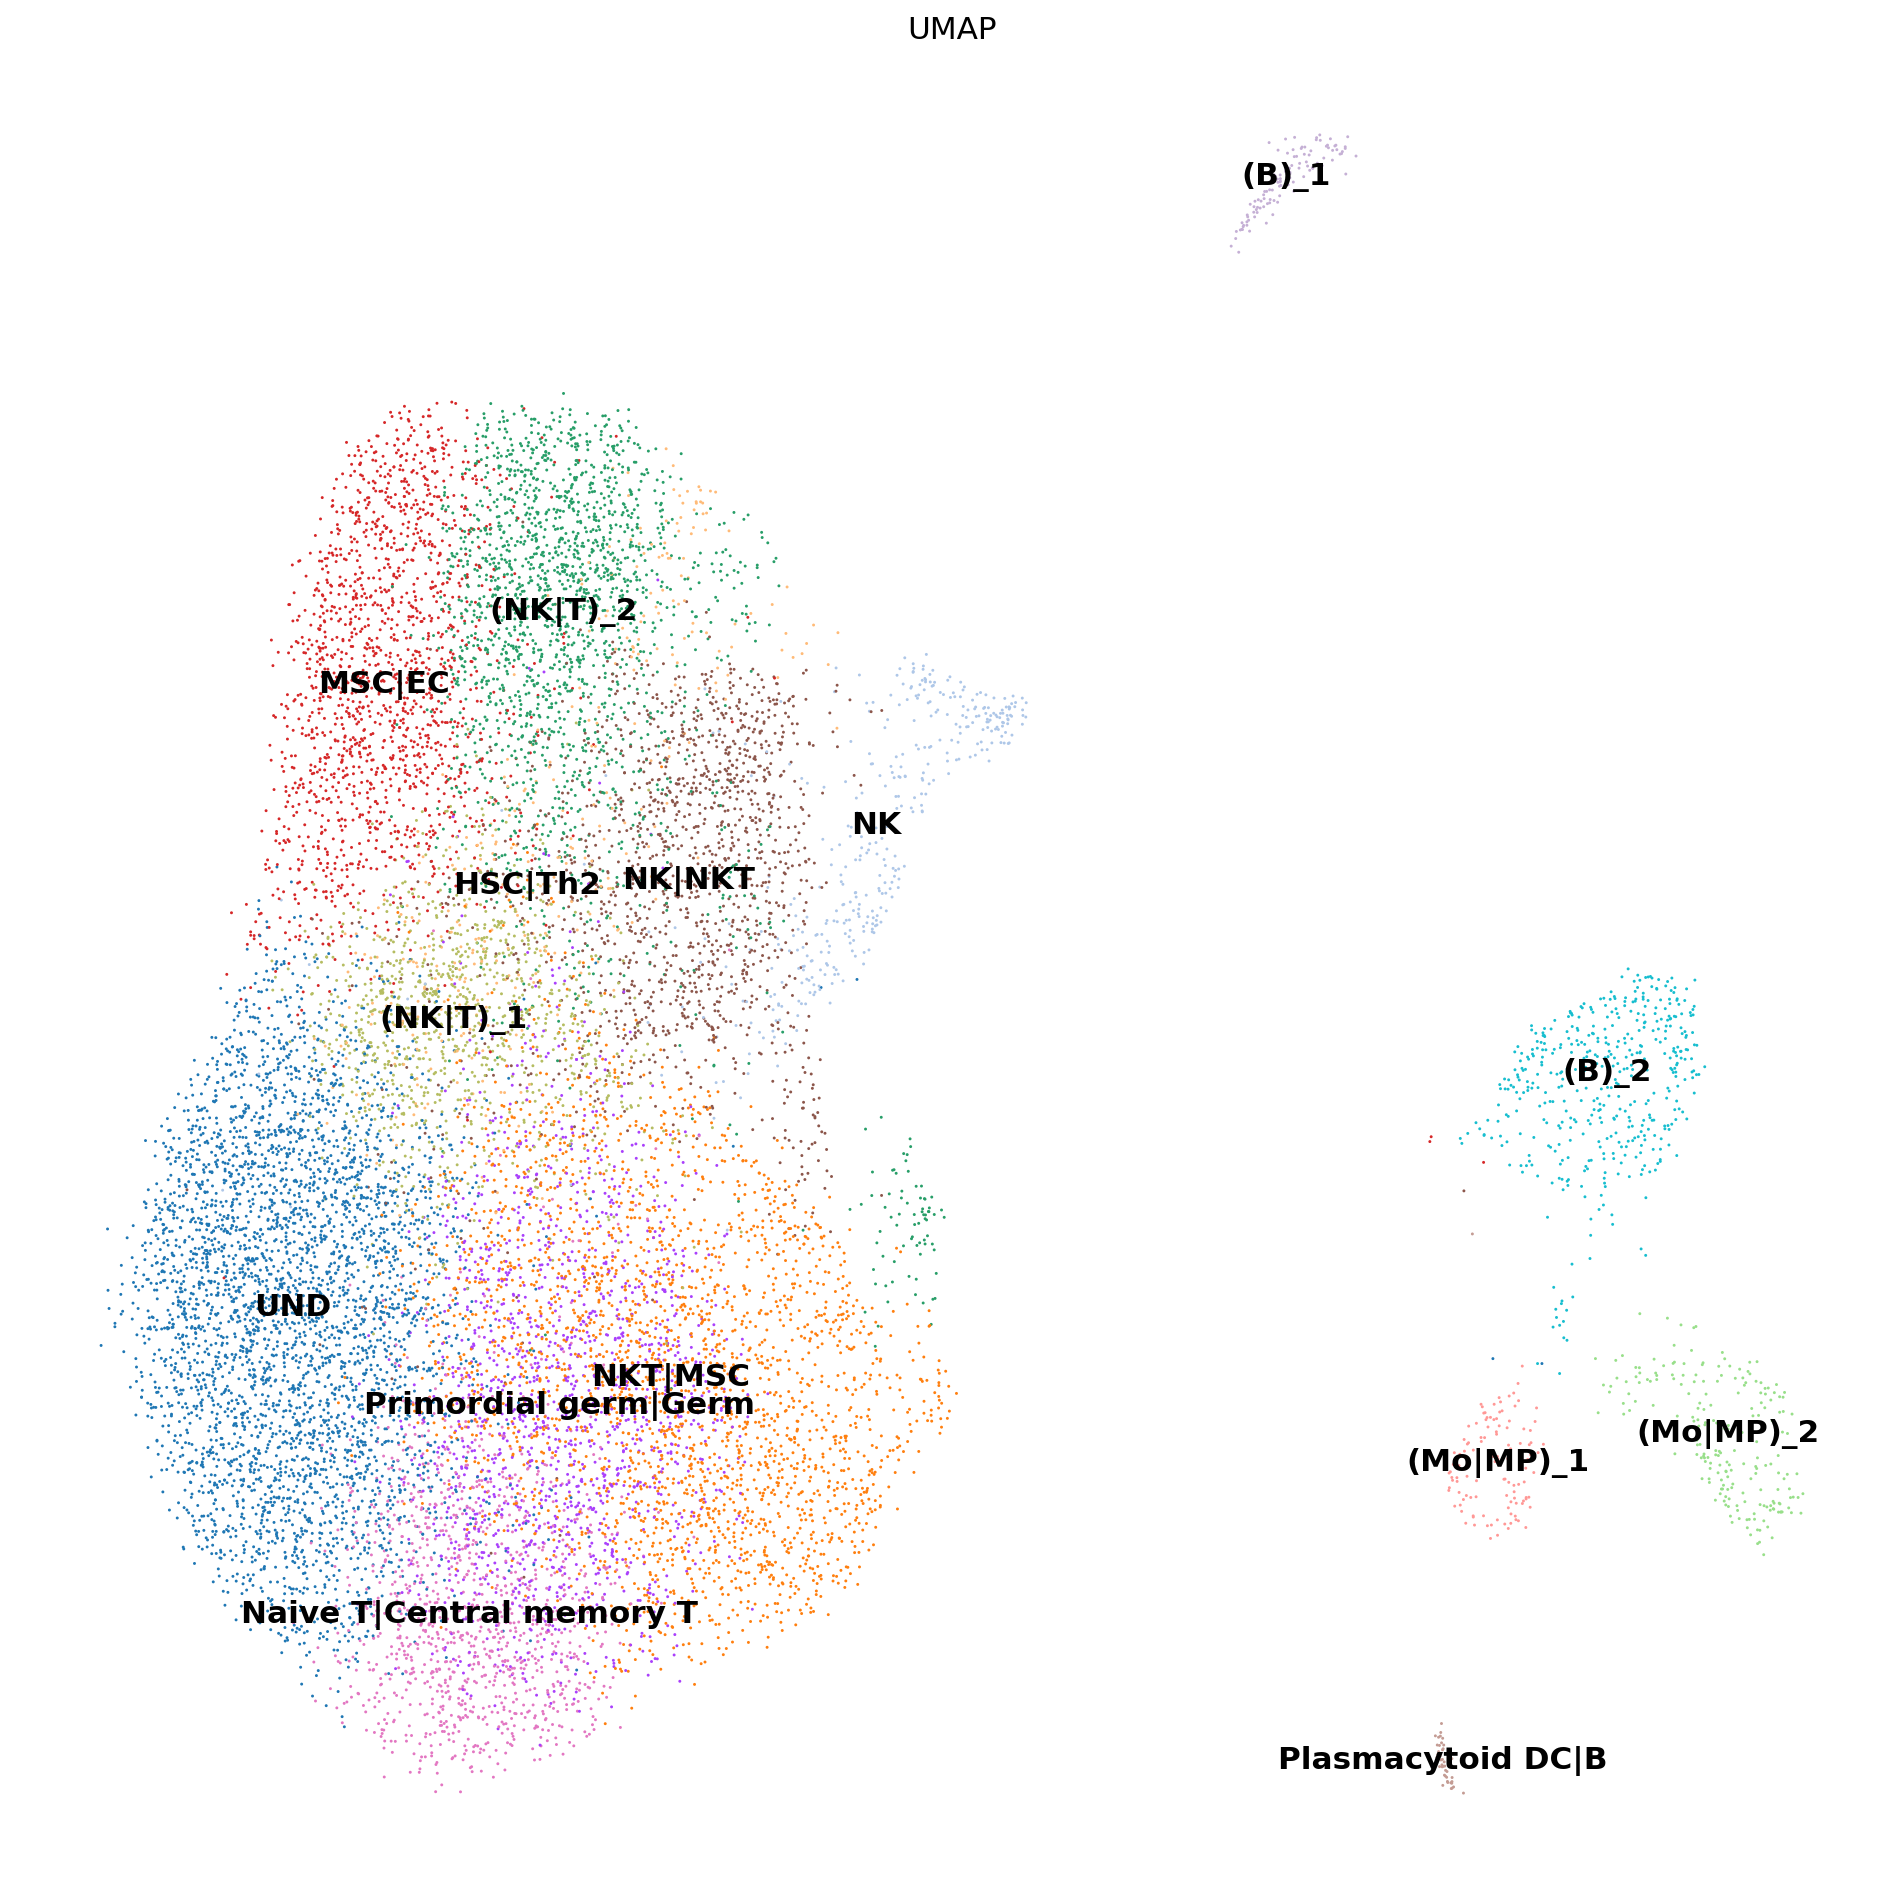

In [10]:
f, ax = plt.subplots(1, 1, figsize = (15, 15))
combined_umap.rename_categories('louvain', umap_cluster_names)
sc.pl.umap(combined_umap, color='louvain', title='UMAP', frameon=False,legend_loc='on data',ax=ax)

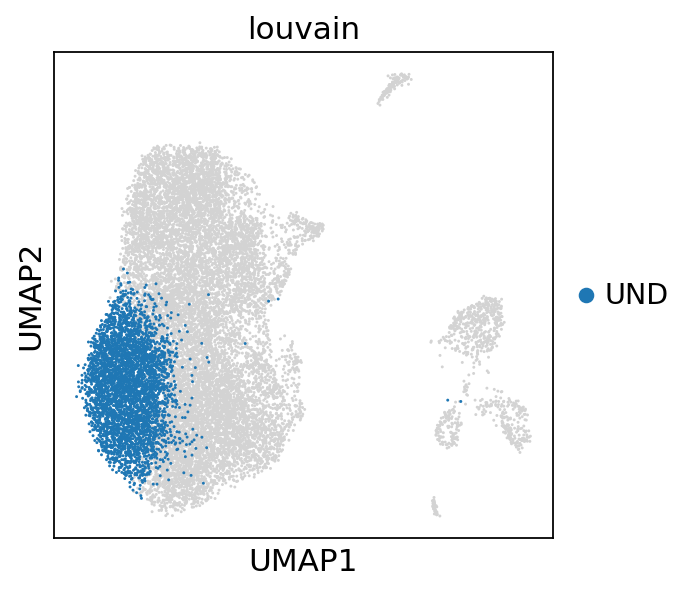

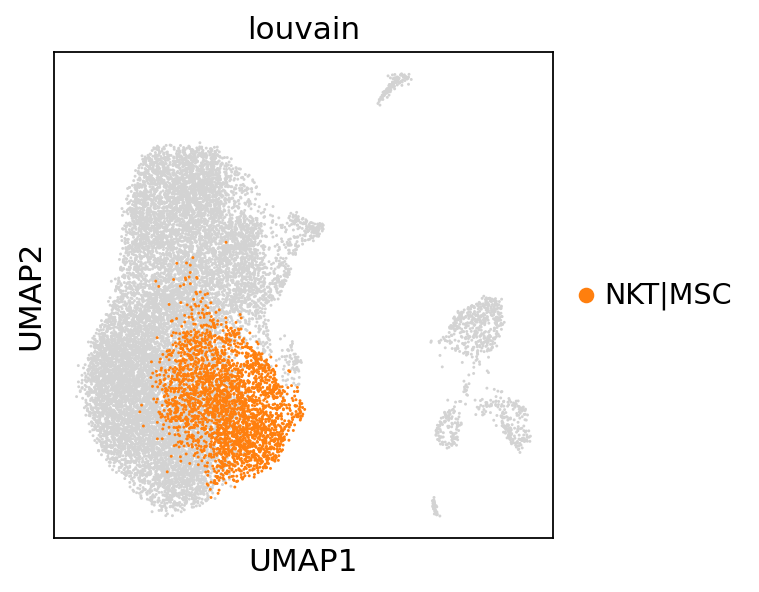

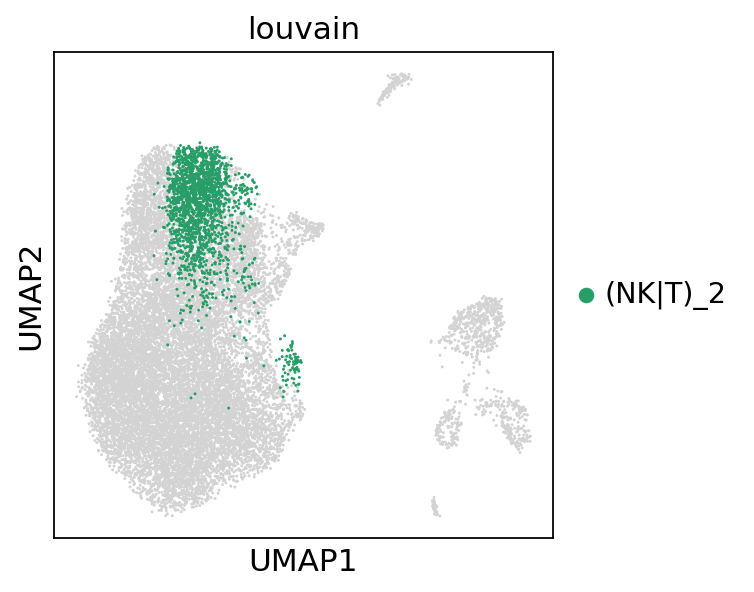

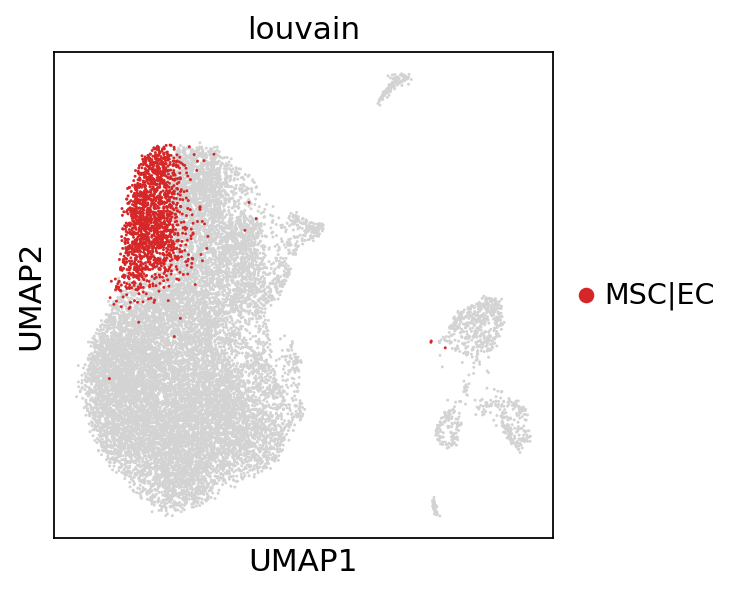

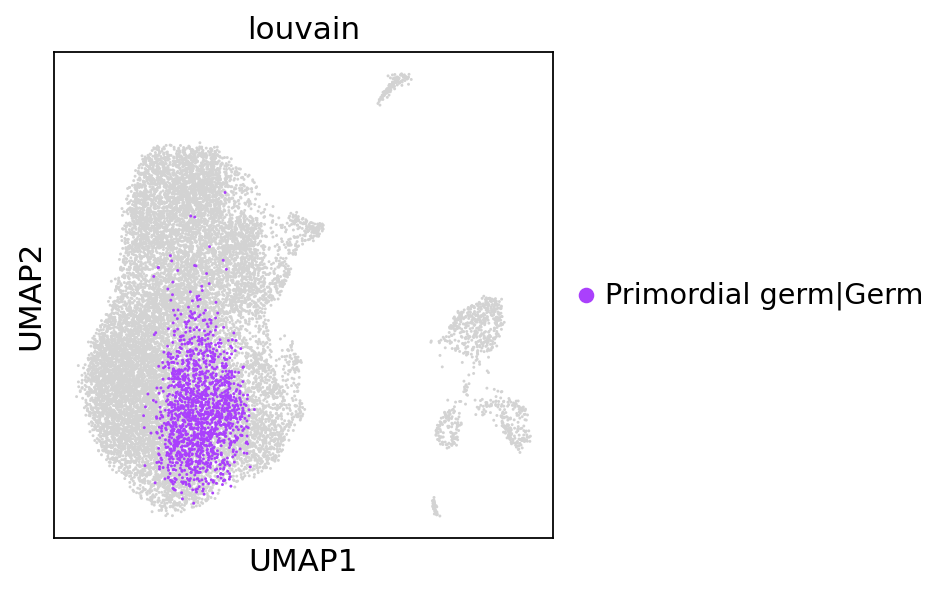

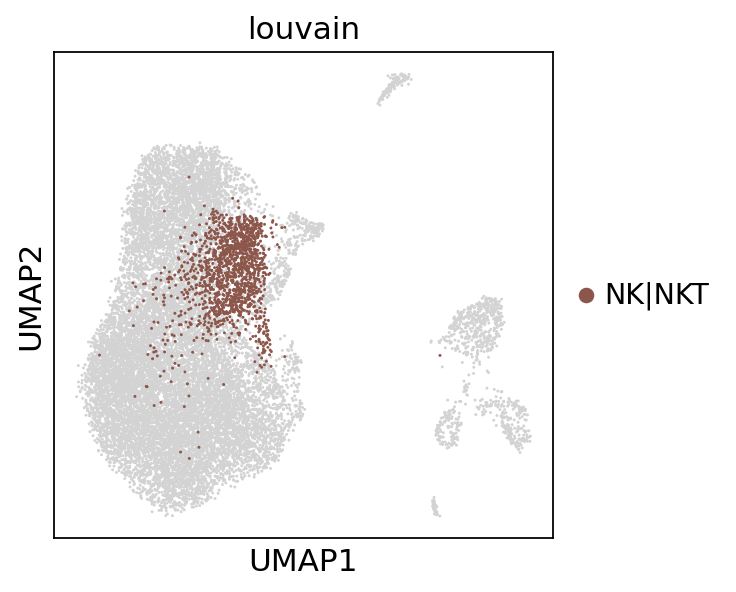

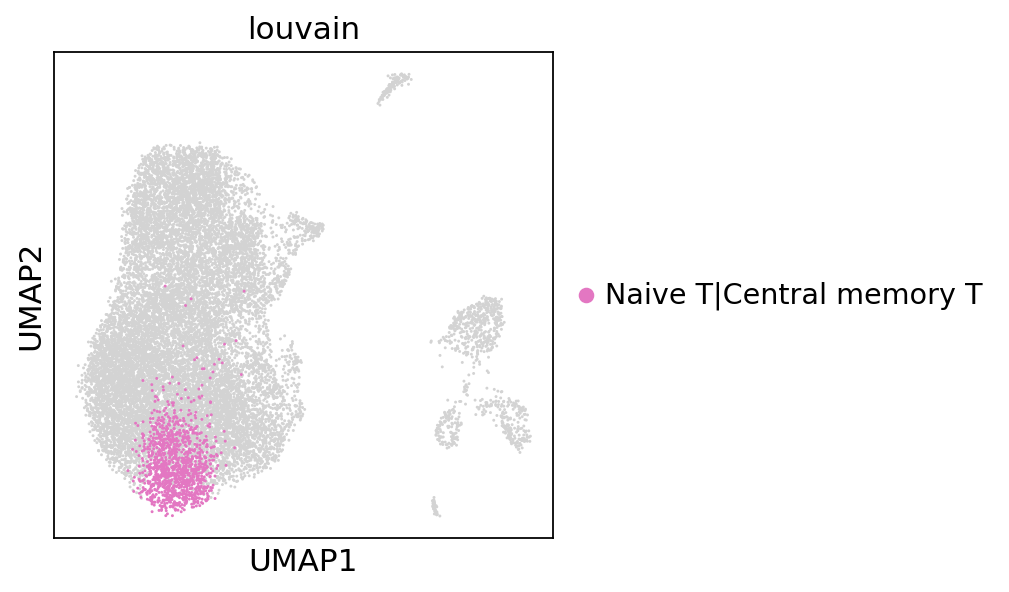

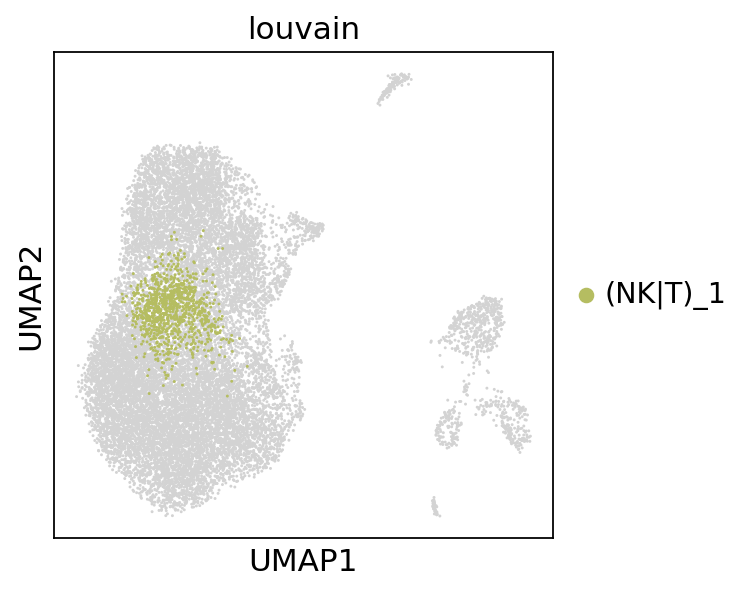

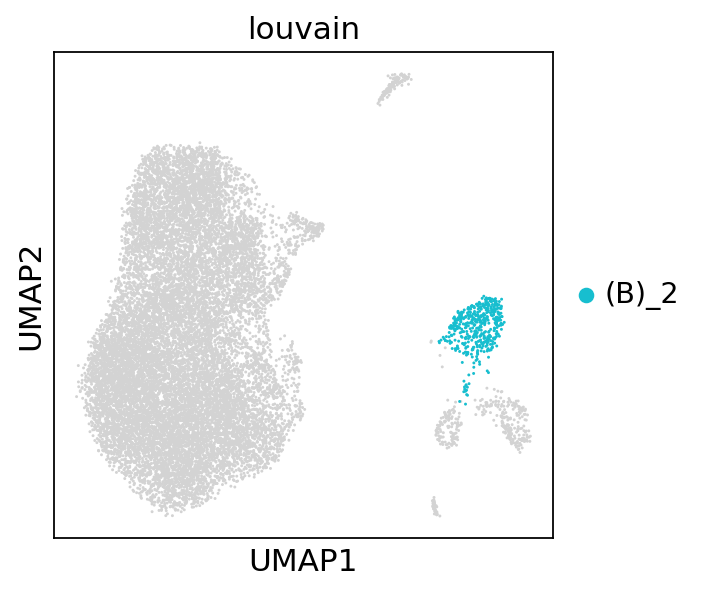

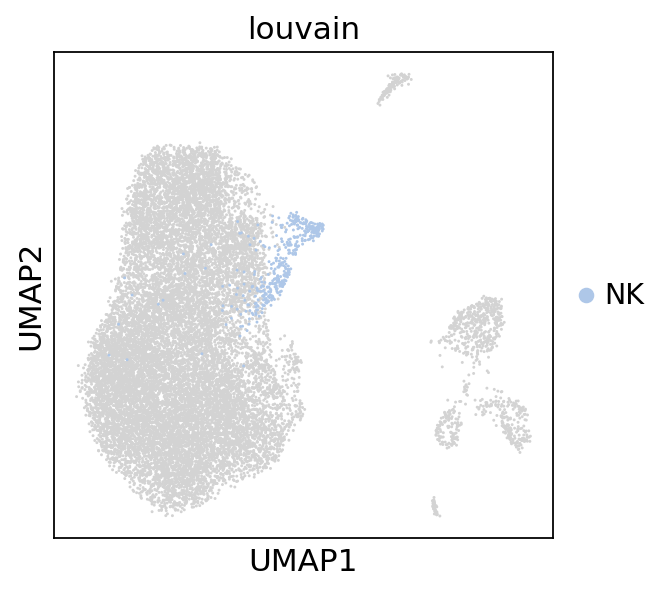

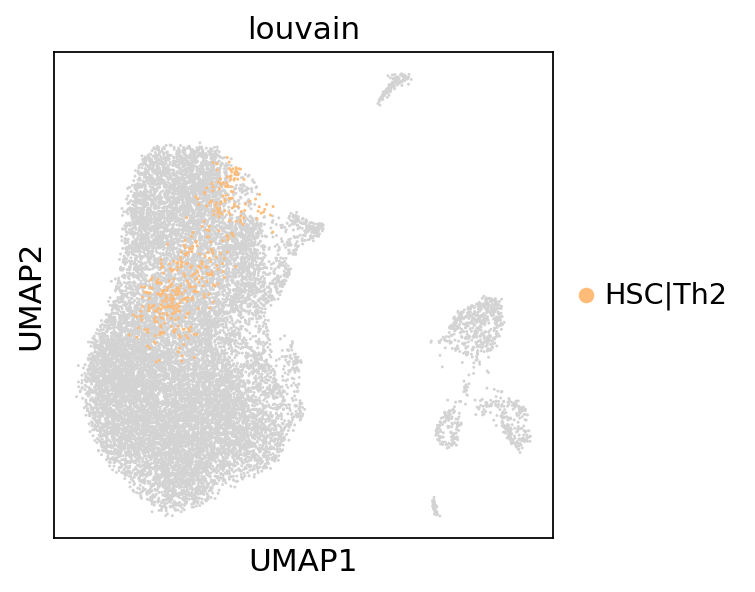

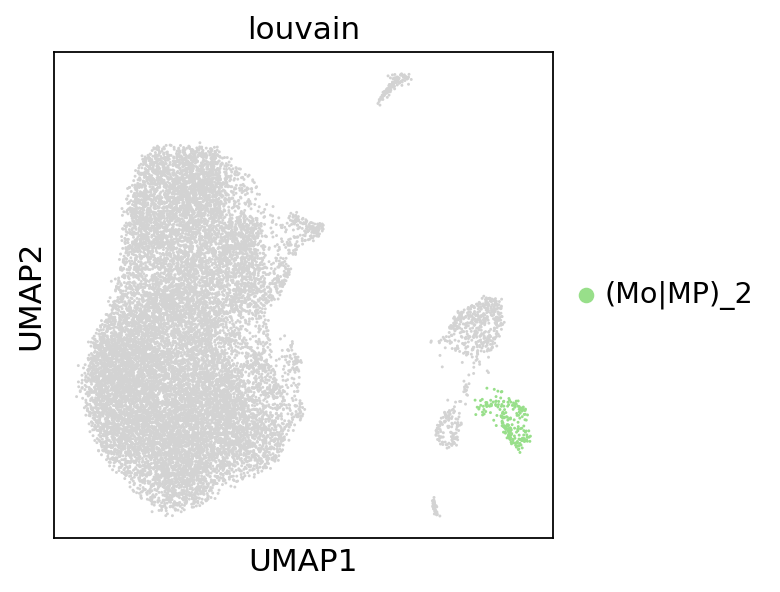

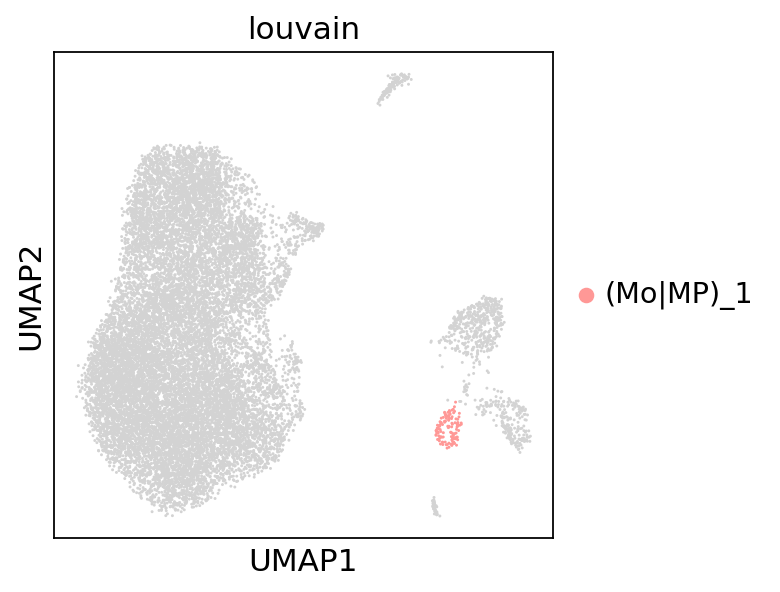

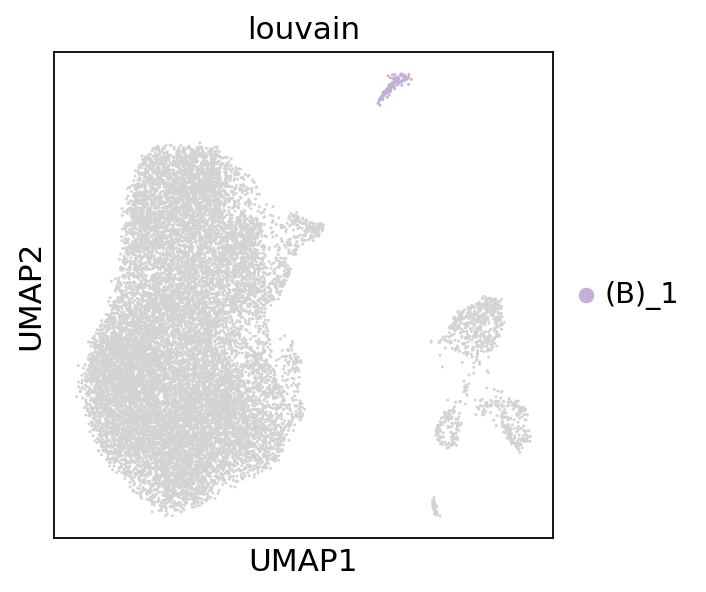

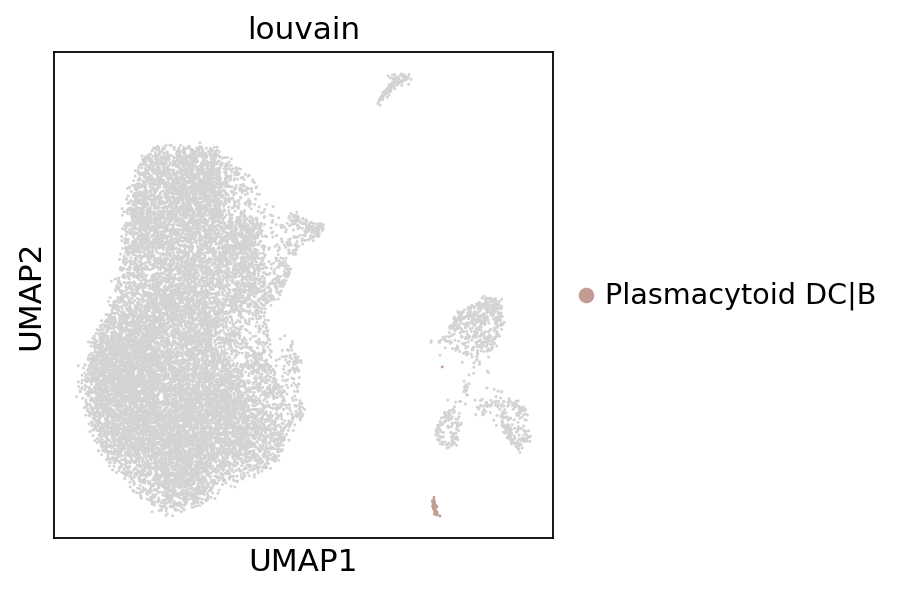

In [12]:
for cluster in umap_cluster_names:
    sc.pl.umap(combined_umap,color='louvain',groups=[cluster])